# Analyzing User Sentiments and Performance of Threads: An Instagram App Reviews Study

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("threads_reviews.csv")

In [ ]:
df.head()

,source,review_description,rating,review_date
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08 14:18:24
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19 20:52:48
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06 23:03:11
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10 00:53:25
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06 16:57:43


In [ ]:
df.tail()

,source,review_description,rating,review_date
32905,App Store,This killed my dog. Mark zuckerburg strangled ...,1,2023-07-06 01:23:55
32906,App Store,Add Search and hashtag like Twitter !,1,2023-07-19 08:01:06
32907,App Store,bad twister,1,2023-07-17 06:39:13
32908,App Store,Yet another trash from Meta.,1,2023-07-07 17:47:16
32909,App Store,Nothing special this app is just a copy of twi...,1,2023-07-07 07:01:43


In [ ]:
df.shape

(32910, 4)

In [ ]:
df.columns

Index(['source', 'review_description', 'rating', 'review_date'], dtype='object')

In [ ]:
df.duplicated().sum()

1

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.isnull().sum()

source                0
review_description    0
rating                0
review_date           0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32909 entries, 0 to 32909
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   source              32909 non-null  object
 1   review_description  32909 non-null  object
 2   rating              32909 non-null  int64 
 3   review_date         32909 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.3+ MB


In [ ]:
df.describe()

,rating
count,32909.000000
mean,3.398432
std,1.751484
min,1.000000
25%,1.000000
50%,4.000000
75%,5.000000
max,5.000000


In [ ]:
df.nunique()

source                    2
review_description    26706
rating                    5
review_date           31667
dtype: int64

In [ ]:
df['source'].unique()

array(['Google Play', 'App Store'], dtype=object)

In [ ]:
df['source'].value_counts()

Google Play    30270
App Store       2639
Name: source, dtype: int64

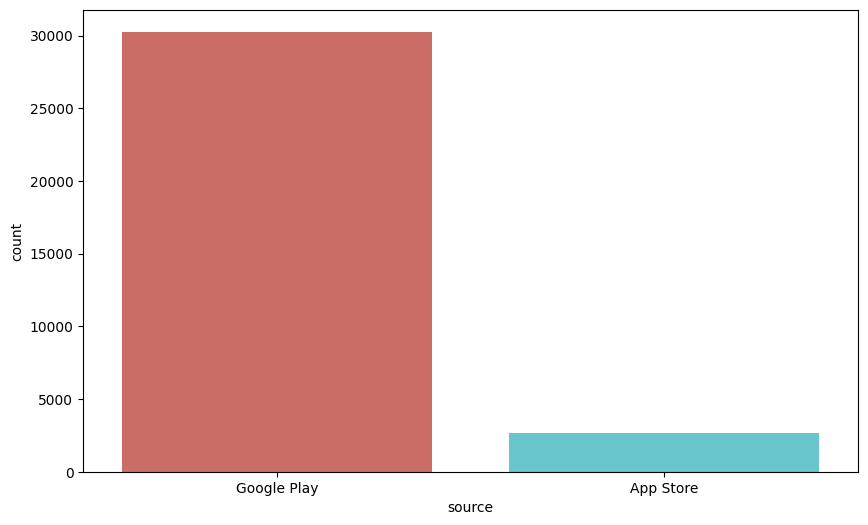

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x = df['source'], data = df, palette = 'hls')
plt.show()

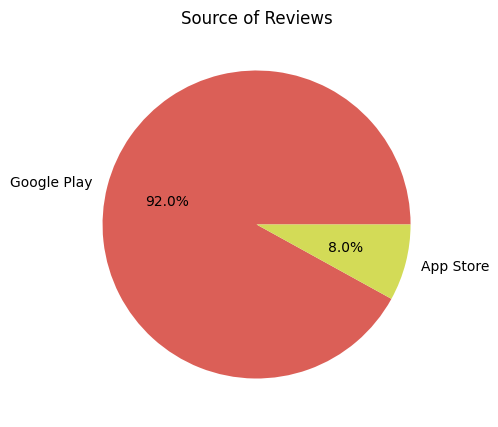

In [ ]:
plt.figure(figsize=(5, 5))
counts = df['source'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=sns.color_palette('hls'))
plt.title('Source of Reviews')
plt.show()

we dont have count plot in go - so we use bar

In [ ]:
fig = go.Figure(data=[go.Bar(x=df['source'].value_counts().index, y=df['source'].value_counts())])
fig.update_layout(title='Source of Reviews',xaxis_title="Source",yaxis_title="Count")
fig.show()

In [ ]:
counts = df['source'].value_counts()
fig = go.Figure(data=[go.Pie(labels=counts.index, values=counts)])
fig.update_layout(title='Source of Reviews')
fig.show()

In [ ]:
df['rating'].unique()

array([2, 3, 1, 5, 4])

In [ ]:
df['rating'].value_counts()

5    15558
1     9726
4     3244
3     2585
2     1796
Name: rating, dtype: int64

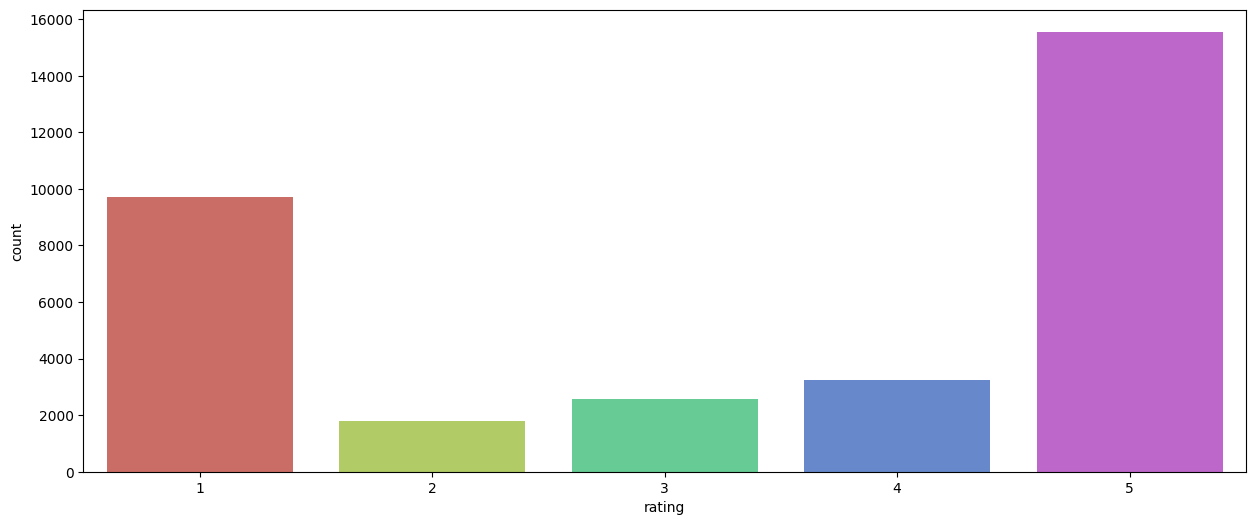

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x = df['rating'], data = df, palette = 'hls')
plt.show()

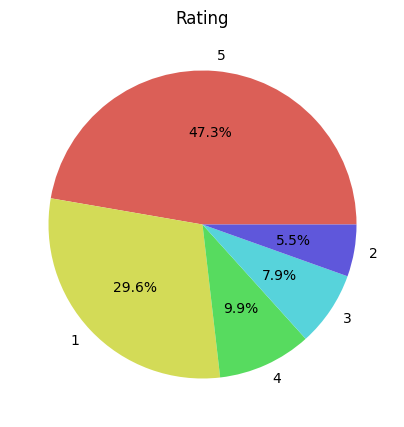

In [ ]:
plt.figure(figsize=(5, 5))
counts = df['rating'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=sns.color_palette('hls'))
plt.title('Rating')
plt.show()

In [ ]:
fig = go.Figure(data=[go.Bar(x=df['rating'].value_counts().index, y=df['rating'].value_counts())])
fig.update_layout(title='Rating',xaxis_title="Rating",yaxis_title="Count")
fig.show()

In [ ]:
counts = df['rating'].value_counts()
fig = go.Figure(data=[go.Pie(labels=counts.index, values=counts)])
fig.update_layout(title='Rating')
fig.show()

In [ ]:
col = df.select_dtypes(include = 'object').columns.tolist()
col

['source', 'review_description', 'review_date']

In [ ]:
df['review_date'] = pd.to_datetime(df['review_date'])

In [ ]:
df1 = df.copy()
df1

,source,review_description,rating,review_date
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08 14:18:24
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19 20:52:48
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06 23:03:11
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10 00:53:25
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06 16:57:43
...,...,...,...,...
32905,App Store,This killed my dog. Mark zuckerburg strangled ...,1,2023-07-06 01:23:55
32906,App Store,Add Search and hashtag like Twitter !,1,2023-07-19 08:01:06
32907,App Store,bad twister,1,2023-07-17 06:39:13
32908,App Store,Yet another trash from Meta.,1,2023-07-07 17:47:16


i have to do trend analysis we should have date as index

In [ ]:
df1.set_index('review_date', inplace=True)

In [ ]:
start_date = df1.index.min()
end_date = df1.index.max()

In [ ]:
print("Start Date of Reviews:", start_date)
print("End Date of Reviews:", end_date)

Start Date of Reviews: 2023-07-05 22:53:12
End Date of Reviews: 2023-07-25 09:42:20


we had 21 days to check time analysis

In [ ]:
week_delta = pd.Timedelta(days = 6) # 3 weeks
current_date = start_date #delta means its a gap

current_week_data = df1[(df1.index >= start_week) & (df1.index < end_week)] :


In [ ]:
while current_date <= end_date:
    start_week = current_date
    end_week = current_date + week_delta
    current_week_data = df1[(df1.index >= start_week) & (df1.index < end_week)]
    weekly_counts = current_week_data.resample('D').size()
    print("resize",weekly_counts)
    fig = px.bar(weekly_counts, x = weekly_counts.index, y = weekly_counts.values,
                 labels={'x': 'Date', 'y': 'Number of Reviews'},
                 title=f'Reviews for Week {start_week.strftime("%Y-%m-%d")} to {end_week.strftime("%Y-%m-%d")}')
    fig.update_layout(xaxis_tickangle=-45)
    fig.show()
    current_date += week_delta

resize review_date
2023-07-05      362
2023-07-06    11429
2023-07-07     7144
2023-07-08     3591
2023-07-09     2152
2023-07-10     1393
2023-07-11     1060
Freq: D, dtype: int64


resize review_date
2023-07-11     30
2023-07-12    859
2023-07-13    734
2023-07-14    592
2023-07-15    498
2023-07-16    404
2023-07-17    276
Freq: D, dtype: int64


resize review_date
2023-07-17     14
2023-07-18    354
2023-07-19    343
2023-07-20    240
2023-07-21    256
2023-07-22    341
2023-07-23    331
Freq: D, dtype: int64


resize review_date
2023-07-23     14
2023-07-24    379
2023-07-25    113
Freq: D, dtype: int64


In [ ]:
daily_counts = df1.resample('D').size()
daily_counts

review_date
2023-07-05      362
2023-07-06    11429
2023-07-07     7144
2023-07-08     3591
2023-07-09     2152
2023-07-10     1393
2023-07-11     1090
2023-07-12      859
2023-07-13      734
2023-07-14      592
2023-07-15      498
2023-07-16      404
2023-07-17      290
2023-07-18      354
2023-07-19      343
2023-07-20      240
2023-07-21      256
2023-07-22      341
2023-07-23      345
2023-07-24      379
2023-07-25      113
Freq: D, dtype: int64

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x = daily_counts.index, y = daily_counts.values,
                     marker_color = 'skyblue'))
fig.update_layout(title = 'Number of Reviews Day-wise',
                  xaxis_title = 'Date',
                  yaxis_title = 'Number of Reviews',
                  xaxis_tickangle = 0)
fig.show()

here we used groupby to get analysis of two ways
now mode = lines gives line one

In [ ]:
fig = go.Figure()
for source_name, source_data in df1.groupby('source'):
    fig.add_trace(go.Scatter(x = source_data.resample('D').size().index, y = source_data.resample('D').size().values,
                            mode ='lines', name = source_name))
fig.update_layout(title = 'Number of Reviews Day-wise',
                  xaxis_title = 'Date',
                  yaxis_title ='Number of Reviews',
                  xaxis_tickangle = 0)
fig.show()

In [ ]:
fig = go.Figure()
for source_name, source_data in df1.groupby('source'):
    fig.add_trace(go.Scatter(x=source_data.resample('D').size().index, y=source_data.resample('D').size().values,
                            mode='markers + lines', name=source_name))
fig.update_layout(title='Number of Reviews Day-wise',
                  xaxis_title='Date',
                  yaxis_title='Number of Reviews',
                  xaxis_tickangle=-45)
fig.show()

In [ ]:
fig = go.Figure()
for rating_val, rating_data in df1.groupby('rating'):
    fig.add_trace(go.Scatter(x=rating_data.resample('D').size().index, y=rating_data.resample('D').size().values,
                             mode ='lines', name = f'Rating {rating_val}'))
fig.update_layout(title='Number of Reviews Day-wise by Rating',
                  xaxis_title='Date',
                  yaxis_title='Number of Reviews',
                  xaxis_tickangle=-45)
fig.show()

In [ ]:
fig = go.Figure()
for rating_val, rating_data in df1.groupby('rating'):
    fig.add_trace(go.Scatter(x=rating_data.resample('D').size().index, y=rating_data.resample('D').size().values,
                             mode='lines + markers', name=f'Rating {rating_val}'))
fig.update_layout(title='Number of Reviews Day-wise by Rating',
                  xaxis_title='Date',
                  yaxis_title='Number of Reviews',
                  xaxis_tickangle=-45)
fig.show()

In [ ]:
df['rating'] = df['rating'].map({1:-1,2:-1,3:0,4:1,5:1})

In [ ]:
df

,source,review_description,rating,review_date
0,Google Play,Meh. Not the greatest experience on a Chromebo...,-1,2023-07-08 14:18:24
1,Google Play,Pretty good for a first launch!! Its easy to u...,0,2023-07-19 20:52:48
2,Google Play,"For a brand new app, it's very well optimized....",0,2023-07-06 23:03:11
3,Google Play,"Great app with a lot of potential! However, th...",0,2023-07-10 00:53:25
4,Google Play,"The app is good, but it needs a lot of functio...",0,2023-07-06 16:57:43
...,...,...,...,...
32905,App Store,This killed my dog. Mark zuckerburg strangled ...,-1,2023-07-06 01:23:55
32906,App Store,Add Search and hashtag like Twitter !,-1,2023-07-19 08:01:06
32907,App Store,bad twister,-1,2023-07-17 06:39:13
32908,App Store,Yet another trash from Meta.,-1,2023-07-07 17:47:16


In [ ]:
df_new = df[['review_description', 'rating']]

In [ ]:
df_new

,review_description,rating
0,Meh. Not the greatest experience on a Chromebo...,-1
1,Pretty good for a first launch!! Its easy to u...,0
2,"For a brand new app, it's very well optimized....",0
3,"Great app with a lot of potential! However, th...",0
4,"The app is good, but it needs a lot of functio...",0
...,...,...
32905,This killed my dog. Mark zuckerburg strangled ...,-1
32906,Add Search and hashtag like Twitter !,-1
32907,bad twister,-1
32908,Yet another trash from Meta.,-1


In [ ]:
df_new['rating'].unique()

array([-1,  0,  1])

In [ ]:
df_new['rating'].value_counts()

 1    18802
-1    11522
 0     2585
Name: rating, dtype: int64

In [ ]:
fig = go.Figure(data = [go.Bar(x = df_new['rating'].value_counts().index, y = df_new['rating'].value_counts())])
fig.update_layout(title = 'Rating',xaxis_title = "Rating",yaxis_title = "Count")
fig.show()

In [ ]:
counts = df_new['rating'].value_counts()
fig = go.Figure(data = [go.Pie(labels = counts.index, values = counts)])
fig.update_layout(title = 'Rating')
fig.show()

In [ ]:
def clean_text(text):
    text = text.lower()
    return text.strip()

In [ ]:
df_new.review_description = df_new.review_description.apply(lambda x: clean_text(x))
df_new.review_description

0        meh. not the greatest experience on a chromebo...
1        pretty good for a first launch!! its easy to u...
2        for a brand new app, it's very well optimized....
3        great app with a lot of potential! however, th...
4        the app is good, but it needs a lot of functio...
                               ...                        
32905    this killed my dog. mark zuckerburg strangled ...
32906                add search and hashtag like twitter !
32907                                          bad twister
32908                         yet another trash from meta.
32909    nothing special this app is just a copy of twi...
Name: review_description, Length: 32909, dtype: object

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punctuation(text):
    punctuationfree = "".join([i for i in text if i not in string.punctuation])
    return punctuationfree

In [ ]:
df_new.review_description = df_new.review_description.apply(lambda x:remove_punctuation(x))

In [ ]:
df_new.review_description = df_new.review_description.apply(lambda x: x.lower())
df_new.review_description

0        meh not the greatest experience on a chromeboo...
1        pretty good for a first launch its easy to use...
2        for a brand new app its very well optimized ho...
3        great app with a lot of potential however ther...
4        the app is good but it needs a lot of function...
                               ...                        
32905    this killed my dog mark zuckerburg strangled h...
32906                 add search and hashtag like twitter 
32907                                          bad twister
32908                          yet another trash from meta
32909    nothing special this app is just a copy of twi...
Name: review_description, Length: 32909, dtype: object

In [ ]:
import re

tokenizer will check for num of words

In [ ]:
def tokenization(text):
    tokens = re.split(' ',text) # W - non alpha numeric (special charcaters), w - alpha numeric
    return tokens

In [ ]:
df_new.review_description = df_new.review_description.apply(lambda x: tokenization(x))

In [ ]:

df_new.review_description

0        [meh, not, the, greatest, experience, on, a, c...
1        [pretty, good, for, a, first, launch, its, eas...
2        [for, a, brand, new, app, its, very, well, opt...
3        [great, app, with, a, lot, of, potential, howe...
4        [the, app, is, good, but, it, needs, a, lot, o...
                               ...                        
32905    [this, killed, my, dog, mark, zuckerburg, stra...
32906         [add, search, and, hashtag, like, twitter, ]
32907                                       [bad, twister]
32908                    [yet, another, trash, from, meta]
32909    [nothing, special, this, app, is, just, a, cop...
Name: review_description, Length: 32909, dtype: object

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')
stopword[0:10]
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [ ]:
def remove_stopwords(text):
    output= " ".join(i for i in text if i not in stopword)
    return output

In [ ]:
df_new.review_description = df_new.review_description.apply(lambda x:remove_stopwords(x))

In [ ]:
df_new.review_description

0        meh greatest experience chromebook seems custo...
1        pretty good first launch easy use selfexplanat...
2        brand new app well optimized however missing q...
3        great app lot potential however lot needs fixe...
4        app good needs lot functionality example searc...
                               ...                        
32905        killed dog mark zuckerburg strangled dog gone
32906                     add search hashtag like twitter 
32907                                          bad twister
32908                               yet another trash meta
32909                     nothing special app copy twitter
Name: review_description, Length: 32909, dtype: object

In [ ]:
def clean_text(text):
    text = re.sub('\[.*\]','', text).strip()
    text = re.sub('\S*\d\S*\s*','', text).strip()
    return text.strip() # it should not be b/w the brackets and digits b/w the alphabets

The `clean_text` function you've provided is a Python function for text preprocessing. It takes an input text and performs two regular expression-based operations to clean and preprocess the text. Let's break down each line of the function:

1. `text = re.sub('\[.*\]','', text).strip()`
   - `re.sub(pattern, replacement, string)` is a function from the `re` module in Python for performing regular expression substitution.
   - `\[\.*\]` is a regular expression pattern that matches square brackets and everything inside them. In regular expressions, square brackets have special meaning, so we need to escape them with a backslash (`\[` and `\]`) to match them literally.
   - `.*` is a wildcard that matches any character (except for a newline character) zero or more times. So, `\[.*\]` matches everything inside square brackets.
   - `''` is the replacement string, which is empty. This means that any text inside square brackets will be replaced with nothing, effectively removing it.
   - `text.strip()` is used to remove any leading or trailing whitespace from the modified text.

2. `text = re.sub('\S*\d\S*\s*','', text).strip()`
   - `\S` is a regular expression pattern that matches any non-whitespace character.
   - `\d` is a regular expression pattern that matches any digit (0-9).
   - `\S*\d\S*` matches any sequence of characters that contains at least one digit but no whitespace in between.
   - `\s*` matches any whitespace characters (including spaces, tabs, or line breaks) zero or more times.
   - `''` is the replacement string, which is empty. This means that any sequence of characters that contains at least one digit but no whitespace in between will be replaced with nothing.
   - `text.strip()` is used to remove any leading or trailing whitespace from the modified text.

Overall, this function is designed to clean and preprocess text by removing two types of patterns:

1. Text enclosed within square brackets, including the square brackets themselves.
2. Any sequence of characters that contains at least one digit but no whitespace in between.

After applying both regular expression substitutions and stripping any remaining whitespace, the function returns the cleaned and preprocessed text. This can be useful for tasks like removing noise or unwanted patterns from text data before further analysis or natural language processing tasks.

In [ ]:
df_new.review_description = df_new.review_description.apply(lambda x: clean_text(x))

In [ ]:
df_new.review_description

0        meh greatest experience chromebook seems custo...
1        pretty good first launch easy use selfexplanat...
2        brand new app well optimized however missing q...
3        great app lot potential however lot needs fixe...
4        app good needs lot functionality example searc...
                               ...                        
32905        killed dog mark zuckerburg strangled dog gone
32906                      add search hashtag like twitter
32907                                          bad twister
32908                               yet another trash meta
32909                     nothing special app copy twitter
Name: review_description, Length: 32909, dtype: object

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

import spacy: This line imports the spaCy library, which is a popular natural language processing (NLP) library in Python. spaCy provides tools and resources for various NLP tasks, including tokenization, named entity recognition, part-of-speech tagging, and more.

nlp = spacy.load('en_core_web_sm'): This line loads a specific spaCy language model named 'en_core_web_sm'. spaCy provides pre-trained language models for several languages, and 'en_core_web_sm' is a small English language model that is commonly used for basic NLP tasks. It's a good choice for tasks like tokenization and part-of-speech tagging when you don't need a larger, more computationally intensive model.

In [ ]:
stopwords = nlp.Defaults.stop_words
def lemmatizer(text):
    doc = nlp(text)
    sent = [token.lemma_ for token in doc if not token.text in set(stopwords)]
    return ' '.join(sent)

In [ ]:
df_new.review_description =  df_new.review_description.apply(lambda x: lemmatizer(x))

In [ ]:
df_new.review_description

0        meh great experience chromebook customize phon...
1        pretty good launch easy use selfexplanatory d ...
2        brand new app optimize miss feature app like t...
3        great app lot potential lot need fix example o...
4        app good need lot functionality example search...
                               ...                        
32905             kill dog mark zuckerburg strangle dog go
32906                      add search hashtag like twitter
32907                                          bad twister
32908                                           trash meta
32909                             special app copy twitter
Name: review_description, Length: 32909, dtype: object

In [ ]:
def remove_urls(vTEXT):
    vTEXT = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', vTEXT, flags=re.MULTILINE)
    return(vTEXT)

re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', vTEXT, flags=re.MULTILINE)

re.sub(pattern, replacement, string, flags) is a function from the re module in Python for performing regular expression substitution.

r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b' is the regular expression pattern used to match URLs. Let's break it down further:

(https|http)? matches the optional "https" or "http" at the beginning of a URL.
:\/\/ matches the colon and double forward slashes that typically appear after "https://" or "http://".
(\w|\.|\/|\?|\=|\&|\%)* matches any combination of word characters, dots, forward slashes, question marks, equals signs, ampersands, and percentage signs. This part of the pattern allows it to match the rest of the URL.
\b is a word boundary anchor. It ensures that the regular expression matches only complete URLs and not partial matches within words.
'' is the replacement string, which is empty. This means that any text matching the URL pattern will be replaced with nothing, effectively removing it.

vTEXT is the input text from which URLs will be removed.

flags=re.MULTILINE is an optional flag that allows the regular expression to match URLs across multiple lines in the input text.

return(vTEXT): The function returns the modified text with URLs removed.

In [ ]:
df_new.review_description = df_new.review_description.apply(lambda x: remove_urls(x))

In [ ]:
def remove_digits(text):
    clean_text = re.sub(r"\b[0-9]+\b\s*", "", text)
    return(text)

In [ ]:
df_new.review_description = df_new.review_description.apply(lambda x: remove_digits(x))

In [ ]:
def remove_digits1(sample_text):
    clean_text = " ".join([w for w in sample_text.split() if not w.isdigit()])
    return(clean_text) #digit in a text

In [ ]:
df_new.review_description = df_new.review_description.apply(lambda x: remove_digits1(x))

In [ ]:
def remove_emojis(data):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"
                               u"\U0001F300-\U0001F5FF"
                               u"\U0001F680-\U0001F6FF"
                               u"\U0001F1E0-\U0001F1FF"
                               "]+", flags=re.UNICODE)
    return re.sub(emoji_pattern, '', data)

emoji_pattern = re.compile("[" u"\U0001F600-\U0001F64F" u"\U0001F300-\U0001F5FF" u"\U0001F680-\U0001F6FF" u"\U0001F1E0-\U0001F1FF" "]+", flags=re.UNICODE)

re.compile(pattern, flags) is a function from the re module in Python that compiles a regular expression pattern into a regular expression object for efficient pattern matching.

The pattern "[u"\U0001F600-\U0001F64F" u"\U0001F300-\U0001F5FF" u"\U0001F680-\U0001F6FF" u"\U0001F1E0-\U0001F1FF"]+" is a regular expression pattern that matches a range of Unicode code points corresponding to emojis. These code point ranges cover a variety of common emojis used in text.

flags=re.UNICODE is an optional flag that indicates that the pattern should be applied to Unicode strings. This is necessary because emojis are represented using Unicode characters.

re.sub(emoji_pattern, '', data)

re.sub(pattern, replacement, string) is a function from the re module in Python for performing regular expression substitution.

emoji_pattern is the regular expression pattern defined earlier, which matches emojis.

'' is the replacement string, which is empty. This means that any text matching the emoji pattern will be replaced with nothing, effectively removing emojis from the input text (data).

return re.sub(emoji_pattern, '', data): The function returns the modified text with emojis removed.

In [ ]:
df_new.review_description = df_new.review_description.apply(lambda x: remove_emojis(x))

In [ ]:
df_new

,review_description,rating
0,meh great experience chromebook customize phon...,-1
1,pretty good launch easy use selfexplanatory d ...,0
2,brand new app optimize miss feature app like t...,0
3,great app lot potential lot need fix example o...,0
4,app good need lot functionality example search...,0
...,...,...
32905,kill dog mark zuckerburg strangle dog go,-1
32906,add search hashtag like twitter,-1
32907,bad twister,-1
32908,trash meta,-1


In [ ]:
import wordcloud

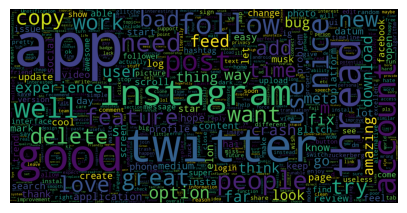

In [ ]:
from wordcloud import WordCloud
data = df_new.review_description
plt.figure(figsize = (5,5))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

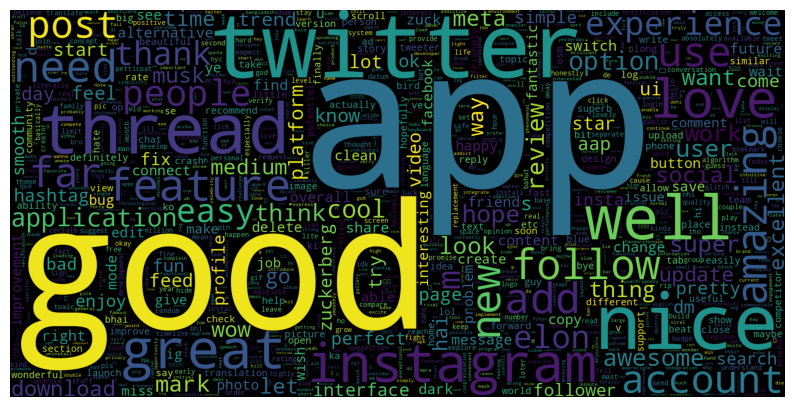

In [ ]:
from wordcloud import WordCloud
data = df_new[df_new['rating'] == 1]['review_description']
plt.figure(figsize = (10,10))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

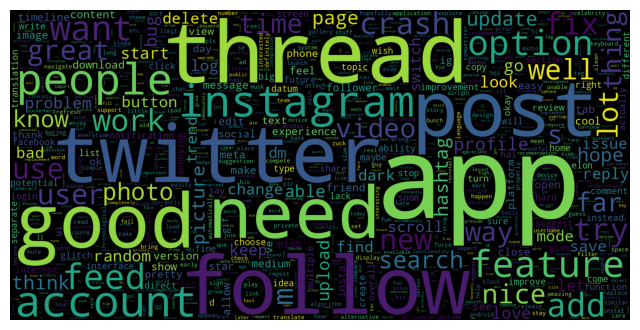

In [ ]:
data = df_new[df_new['rating'] == 0]['review_description']
plt.figure(figsize = (8,7))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

we can create custom word cloud also

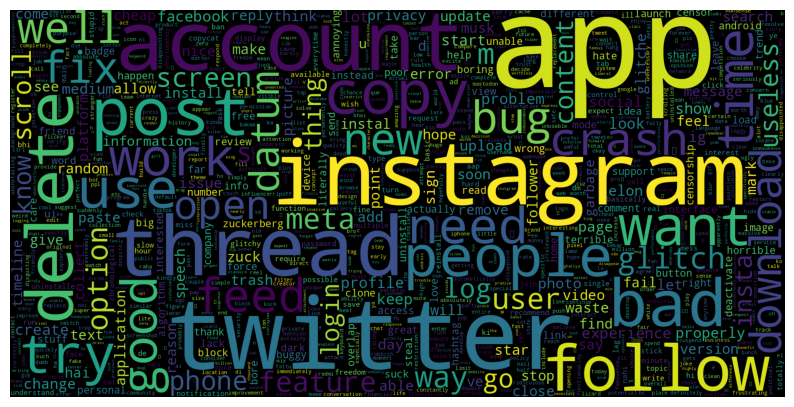

In [ ]:
data = df_new[df_new['rating'] == -1]['review_description']
plt.figure(figsize = (10,10))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

The TfidfVectorizer is a popular text feature extraction method used in natural language processing (NLP) and machine learning. It stands for "Term Frequency-Inverse Document Frequency Vectorizer." This vectorizer is part of the scikit-learn library in Python and is used to convert a collection of raw text documents into a matrix of TF-IDF features. Let's break down what TF-IDF and the TfidfVectorizer do:

Term Frequency (TF): Term Frequency measures the frequency of a term (word) in a document. It is calculated as the number of times a term appears in a document divided by the total number of terms in that document. The idea is to give higher weight to words that appear frequently within a document because they are likely to be important for that document.

Inverse Document Frequency (IDF): Inverse Document Frequency measures the importance of a term in the entire corpus (collection of documents). It is calculated as the logarithm of the total number of documents divided by the number of documents containing the term. Terms that are common across many documents receive a lower IDF score, whereas terms that are rare and specific to a few documents receive a higher IDF score.

TF-IDF: The TF-IDF score combines both Term Frequency and Inverse Document Frequency to assign a weight to each term in a document relative to its importance in the entire corpus. It is calculated as TF * IDF.

The TfidfVectorizer takes a list of text documents as input and performs the following steps:

Tokenization: It breaks down each document into individual words or tokens.
TF-IDF Calculation: It calculates the TF-IDF score for each word in each document.
Vectorization: It creates a numerical matrix where each row represents a document, and each column represents a unique word (term) from the entire corpus. The values in the matrix are the TF-IDF scores.

In [ ]:
tf1=TfidfVectorizer()
data_vec=tf1.fit_transform(df_new['review_description'])

In [ ]:
data_vec

<32909x17434 sparse matrix of type '<class 'numpy.float64'>'
	with 183457 stored elements in Compressed Sparse Row format>

In [ ]:
import pickle

In [ ]:
with open('tfidf_vectorizer.pkl', 'wb') as model_file:
  pickle.dump(tf1, model_file)

In [ ]:
y=df_new['rating'].values

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(data_vec,y,test_size=0.2,stratify = y, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state = 42)
x_balanced , y_balanced = smote.fit_resample(X_train, y_train)

SMOTE stands for "Synthetic Minority Over-sampling Technique." It is a technique used in machine learning and particularly in the context of imbalanced datasets to address the problem of class imbalance. Class imbalance occurs when one class (the minority class) has significantly fewer samples than another class (the majority class).

SMOTE works by generating synthetic examples for the minority class to balance the class distribution. It does this by creating synthetic instances that are similar to the existing minority class instances. Here's how SMOTE works:

Selecting a Minority Instance: SMOTE starts by randomly selecting a minority instance from the dataset.

Finding Nearest Neighbors: It then identifies the k-nearest neighbors of the selected instance within the minority class. The value of k is a parameter that you can specify.

Creating Synthetic Instances: SMOTE generates synthetic instances by interpolating between the selected instance and its k-nearest neighbors. It creates new instances along the line segments connecting the selected instance to its neighbors. The number of synthetic instances generated is also a parameter that you can control.

Adding Synthetic Instances: Finally, the synthetic instances are added to the dataset, effectively balancing the class distribution.

The goal of SMOTE is to increase the number of minority class samples in a way that doesn't introduce too much noise into the dataset. By creating synthetic examples that are similar to real instances, SMOTE aims to improve the classifier's ability to learn the minority class and make better predictions on imbalanced datasets.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
sv = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
ad = AdaBoostClassifier()

models = [sv, dt, rf, ad]

accuracies = []

for model in models:
    print('Results for the model:', model.__class__.__name__)
    model.fit(X_balanced, y_balanced)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy:', accuracy)
    cm = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:\n', cm)
    report = classification_report(y_test, y_pred)
    print('Classification Report:\n', report)
    print('\n')
    accuracies.append(accuracy)

print('List of Accuracies:', accuracies)

Results for the model: SVC
Accuracy: 0.7560012154360377
Confusion Matrix:
 [[1707  101  496]
 [ 209   58  250]
 [ 265  285 3211]]
Classification Report:
               precision    recall  f1-score   support

          -1       0.78      0.74      0.76      2304
           0       0.13      0.11      0.12       517
           1       0.81      0.85      0.83      3761

    accuracy                           0.76      6582
   macro avg       0.57      0.57      0.57      6582
weighted avg       0.75      0.76      0.75      6582



Results for the model: DecisionTreeClassifier
Accuracy: 0.6997872986934063
Confusion Matrix:
 [[1458  246  600]
 [ 178  120  219]
 [ 438  295 3028]]
Classification Report:
               precision    recall  f1-score   support

          -1       0.70      0.63      0.67      2304
           0       0.18      0.23      0.20       517
           1       0.79      0.81      0.80      3761

    accuracy                           0.70      6582
   macro avg      

In [ ]:
model_names = ['SVC', 'DecisionTree', 'RandomForest', 'AdaBoost']
fig = go.Figure(data=go.Bar(x=model_names, y=accuracies))
fig.update_layout(title='Model Accuracies',
                  xaxis_title='Model',
                  yaxis_title='Accuracy',
                  yaxis_tickformat='.2%',
                  yaxis_range=[0, 1],
                  xaxis_tickangle=0)
fig.show()

In [ ]:
import

In [ ]:
model_filename = 'svm_model.pkl'
with open(model_filename, 'wb') as model_file:
  pickle.dump(sv, model_file)